In [835]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [836]:
df = pd.read_csv(r'data/hotel_bookings.csv')

In [837]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [838]:
# perform data cleaning

In [839]:
df.shape

(119390, 32)

In [840]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [841]:
# drop 'agent' and 'company' columns since they had large empty values

In [842]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [843]:
df.country.value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [844]:
# fill empty values to 'country' column with its mode.

In [845]:
df.country.fillna(df.country.value_counts().index[0], inplace=True)

In [846]:
df.fillna(0, inplace=True)

In [847]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [848]:
filter1 = (df.children == 0) & (df.adults == 0) & (df.babies == 0)

In [849]:
data = df[~filter1]

In [850]:
data.shape

(119210, 30)

In [851]:
# where did the guests come from?

In [852]:
data.is_canceled.unique()

array([0, 1], dtype=int64)

In [853]:
len(data[data.is_canceled == 0])

75011

In [854]:
data[data.is_canceled == 0].country.value_counts() / 75011

country
PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: count, Length: 165, dtype: float64

In [855]:
country_wise_data = data[data.is_canceled == 0].country.value_counts().reset_index()

In [856]:
country_wise_data.columns = ['country', 'no_of_guests']

In [857]:
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [858]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

In [859]:
country_wise_data.columns

Index(['country', 'no_of_guests'], dtype='object')

In [860]:
map_guests = px.choropleth(country_wise_data,
              locations=country_wise_data.country,
              color=country_wise_data.no_of_guests,
              hover_name=country_wise_data.country,
              title='home country of guests')

In [861]:
map_guests.show()

In [862]:
# how much did guests pay for a room per night?

In [863]:
data2 = data[data.is_canceled == 0]

Text(0, 0.5, 'price in eur')

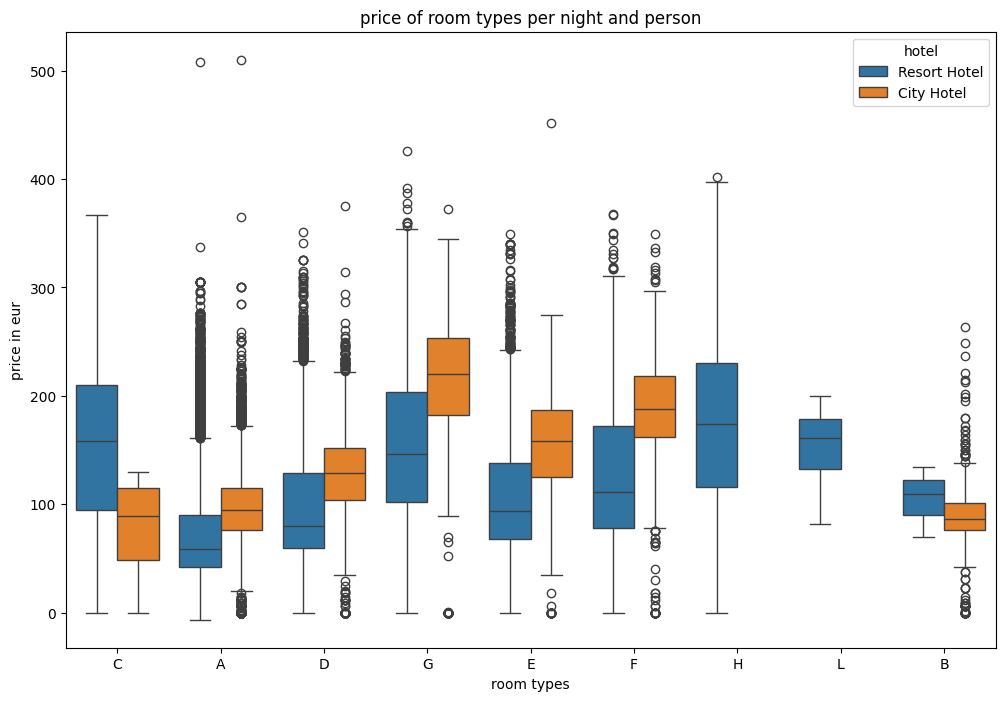

In [864]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)

plt.title('price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price in eur')

In [865]:
# which are the busiest month

In [866]:
data_resort = data[(data.hotel == 'Resort Hotel') & (data.is_canceled == 0)]
data_city = data[(data.hotel == 'City Hotel') & (data.is_canceled == 0)]

In [867]:
rush_resort = data_resort.arrival_date_month.value_counts().reset_index()
rush_resort.columns = ['month', 'no_of_guest']
rush_resort

,month,no_of_guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [868]:
rush_city = data_city.arrival_date_month.value_counts().reset_index()
rush_city.columns=['month', 'no_of_guest']
rush_city

,month,no_of_guest
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [869]:
final_rush = rush_resort.merge(rush_city, on='month')

In [870]:
final_rush.columns=['month', 'no_of_guest_in_resort', 'no_of_guest_in_city']

In [871]:
final_rush

,month,no_of_guest_in_resort,no_of_guest_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [872]:
import sort_dataframeby_monthorweek as sd

In [873]:
finals_rush = sd.Sort_Dataframeby_Month(final_rush, 'month')

In [874]:
final_rush.columns

Index(['month', 'no_of_guest_in_resort', 'no_of_guest_in_city'], dtype='object')

In [875]:
fig = px.line(final_rush, x='month', y=['no_of_guest_in_resort', 'no_of_guest_in_city'])
fig.show()

In [876]:
# which month has highest 'adr'

In [877]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

In [878]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015


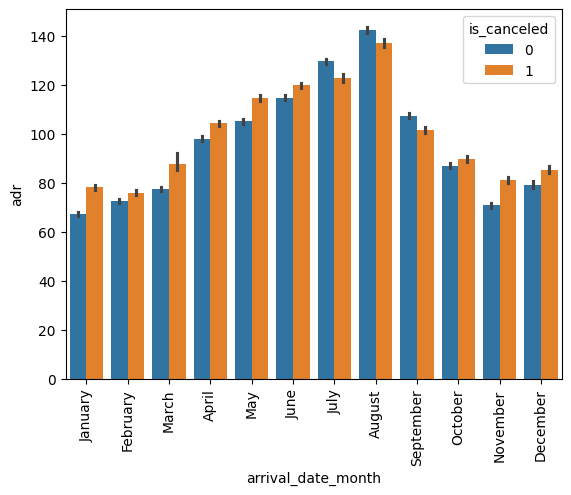

In [879]:
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

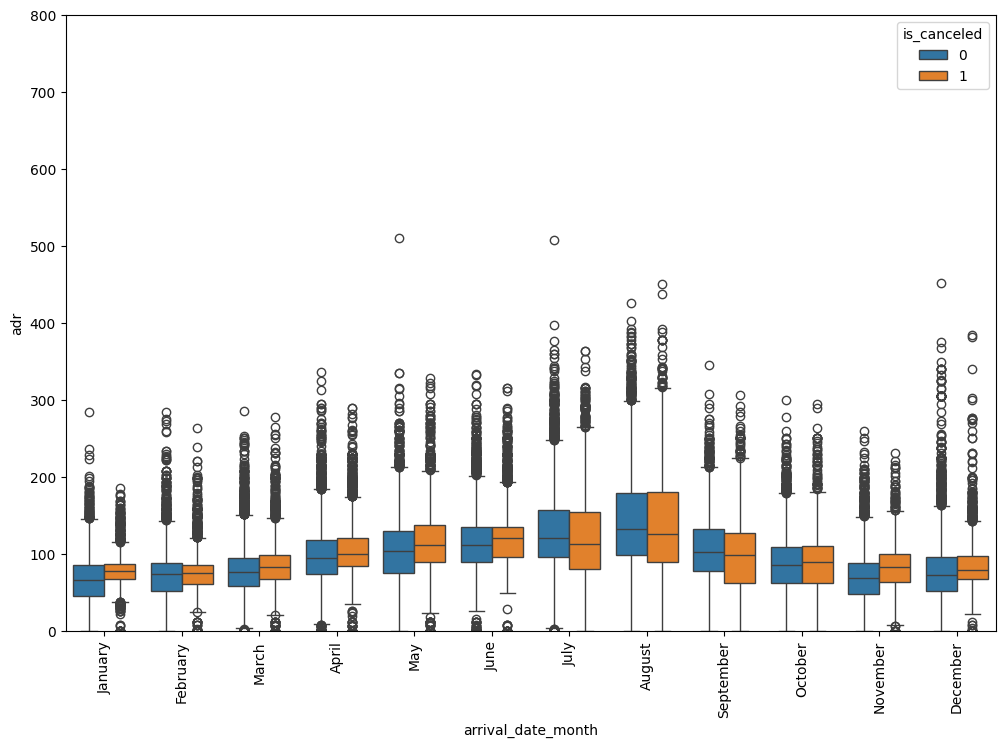

In [880]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')

plt.ylim(0,800)
plt.show()

In [881]:
# analyse whether bookings were made only for weekdays or for weekends or for both

In [882]:
pd.crosstab(index=data['stays_in_weekend_nights'], columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [883]:
data2.stays_in_week_nights.unique()

array([ 0,  1,  2,  4,  5, 10, 11,  3,  8,  6,  7,  9, 33, 12, 20, 15, 21,
       13, 30, 42, 50, 25, 14, 17, 32, 16, 40, 19, 26, 34, 18],
      dtype=int64)

In [884]:
def week_function(row):
  feature1 = 'stays_in_weekend_nights'
  feature2 = 'stays_in_week_nights'

  if row[feature2] == 0 and row[feature1] > 0:
    return 'stay_just_weekend'

  if row[feature2] > 0 and row[feature1] == 0:
    return 'stay_just_weekdays'

  if row[feature2] > 0 and row[feature1] > 0:
    return 'stay_both_weekdays_weekend'

  else:
    return 'undefined_data'

In [885]:
data2['weekend_or_weekday'] = data2.apply(week_function, axis=1)

In [886]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [887]:
data2.weekend_or_weekday.value_counts()

weekend_or_weekday
stay_both_weekdays_weekend    37551
stay_just_weekdays            31788
stay_just_weekend              5050
undefined_data                  622
Name: count, dtype: int64

In [888]:
data2 = sd.Sort_Dataframeby_Month(data2, 'arrival_date_month')

In [889]:
data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday        
April               stay_both_weekdays_weekend    3627
                    stay_just_weekdays            2559
                    stay_just_weekend              344
                    undefined_data                  30
August              stay_both_weekdays_weekend    4929
                    stay_just_weekdays            3137
                    stay_just_weekend              509
                    undefined_data                  49
December            stay_both_weekdays_weekend    1901
                    stay_just_weekdays            2123
                    stay_just_weekend              298
                    undefined_data                  69
February            stay_both_weekdays_weekend    2438
                    stay_just_weekdays            2514
                    stay_just_weekend              360
                    undefined_data                  47
January             stay_both_weekdays_weekend    1550
                  

In [890]:
grouped_data = data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

In [891]:
grouped_data

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,3627,2559,344,30
1,August,4929,3137,509,49
2,December,1901,2123,298,69
3,February,2438,2514,360,47
4,January,1550,2125,393,47
5,July,4570,2818,462,57
6,June,3241,2685,433,36
7,March,3151,3060,359,50
8,May,3442,3017,570,74
9,November,2117,2214,261,59


In [892]:
sorted_data = sd.Sort_Dataframeby_Month(grouped_data, 'arrival_date_month')

In [893]:
sorted_data.set_index('arrival_date_month', inplace=True)

In [894]:
sorted_data

,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

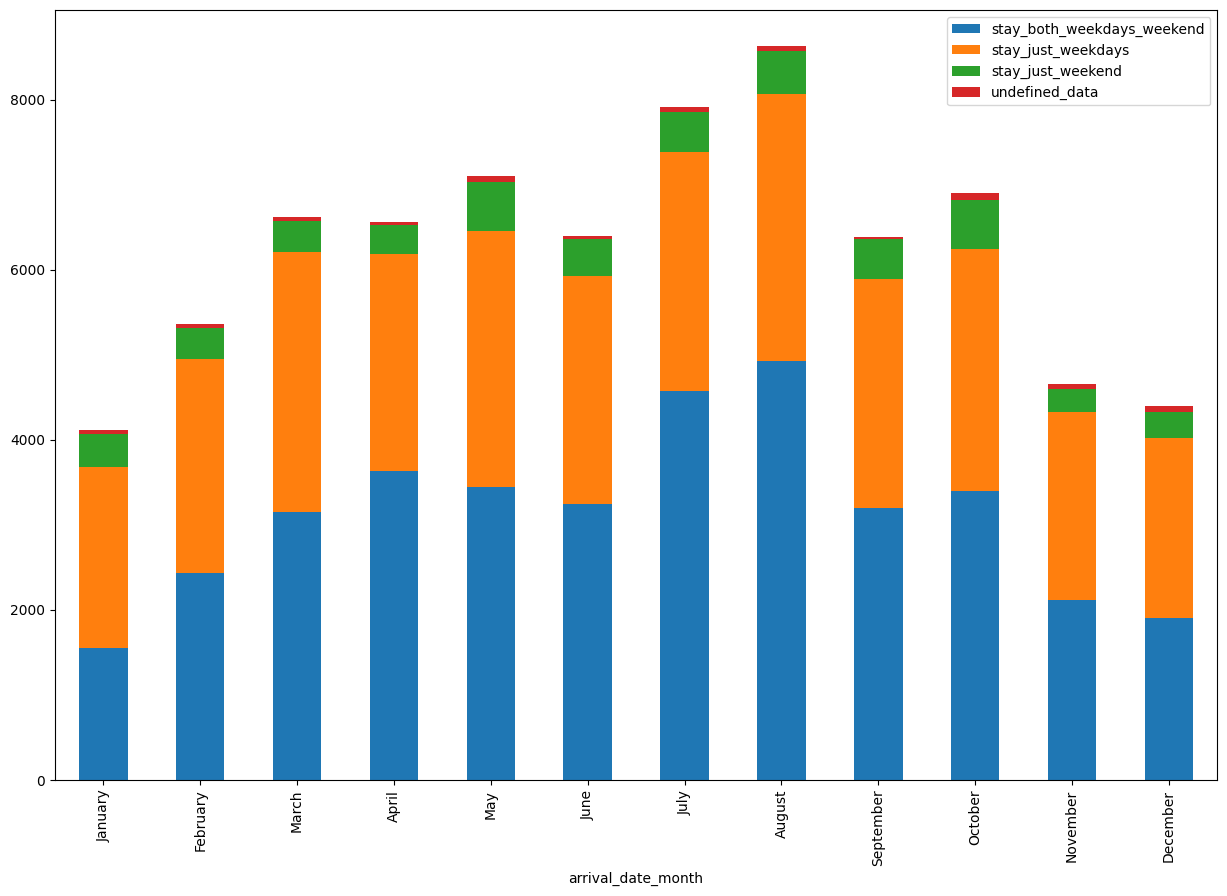

In [895]:
sorted_data.plot(kind='bar', stacked=True, figsize=(15,10))

In [896]:
# how to create some more features

In [897]:
def family(row):
  if (row.adults > 0) and (row.children > 0 or row.babies > 0):
    return 1
  
  else:
    return 0

In [898]:
data['is_family'] = data.apply(family, axis=1)

In [899]:
data['total_customer'] = data.adults + data.babies + data.children

In [900]:
data['total_nights'] = data.stays_in_week_nights + data.stays_in_weekend_nights

In [901]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2


In [902]:
data.deposit_type.unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [903]:
dict1 = {
    'No Deposit':0,
    'Non Refund':1,
    'Refundable':0
    }

In [904]:
data['deposit_given'] = data.deposit_type.map(dict1)

In [905]:
# how to apply feature encoding on the data

In [906]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0


In [907]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [908]:
cat_features = [col for col in data.columns if data[col].dtype == 'object']

In [909]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [910]:
num_features = [col for col in data.columns if data[col].dtype != 'object']

In [911]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [912]:
data_cat = data[cat_features]

In [915]:
data_cat['cancellation'] = data.is_canceled

In [916]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,No Deposit,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,No Deposit,Transient,Canceled,12/22/2015,1


In [917]:
cols = data_cat.columns

In [918]:
cols = cols[0:-1]

In [919]:
data_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,No Deposit,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,No Deposit,Transient,Canceled,12/22/2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,December,BB,BRA,Direct,Direct,E,F,No Deposit,Transient,Check-Out,1/6/2017,0
119206,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,1/6/2017,0
119207,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,No Deposit,Transient,Check-Out,1/7/2017,0
119208,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,No Deposit,Transient-Party,Check-Out,1/8/2017,0


In [920]:
for col in cols:
  dict2 = data_cat.groupby(col).cancellation.mean().to_dict()
  data_cat[col] = data_cat[col].map(dict2)

In [921]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.28402,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.28402,0.407864,1.0,0.684211,1


In [922]:
# handle outliers

In [923]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,2,0.0,0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,2,2.0,0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,2,0.0,0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,2,0.0,0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,2,2.0,0,...,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,2,1.0,0,...,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,2,0.0,0,...,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,2,0.0,0,...,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,2,0.0,0,...,0,2,0,68.57,0,2,0,2.0,12,0


In [924]:
dataframe = pd.concat([data_cat, data[num_features]], axis=1)

In [925]:
dataframe.drop('cancellation', axis=1, inplace=True)

In [926]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,...,0,0,0,89.00,0,1,0,2.0,1,0


<Axes: xlabel='lead_time', ylabel='Count'>

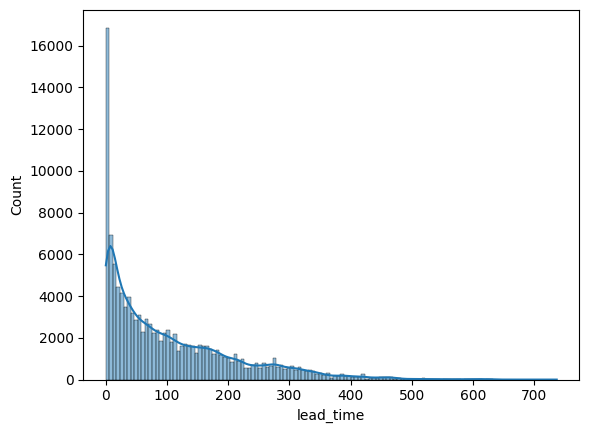

In [927]:
sns.histplot(dataframe.lead_time, kde=True)

In [928]:
def handle_outliers(col):
  dataframe[col] = np.log1p(dataframe[col])

In [929]:
handle_outliers('lead_time')

<Axes: xlabel='lead_time', ylabel='Count'>

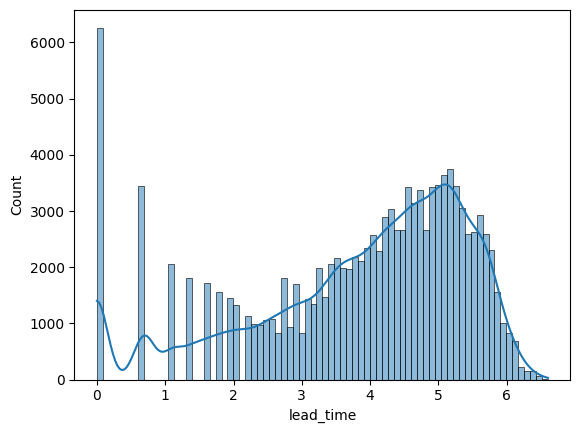

In [930]:
sns.histplot(dataframe.lead_time, kde=True)

<Axes: xlabel='adr', ylabel='Count'>

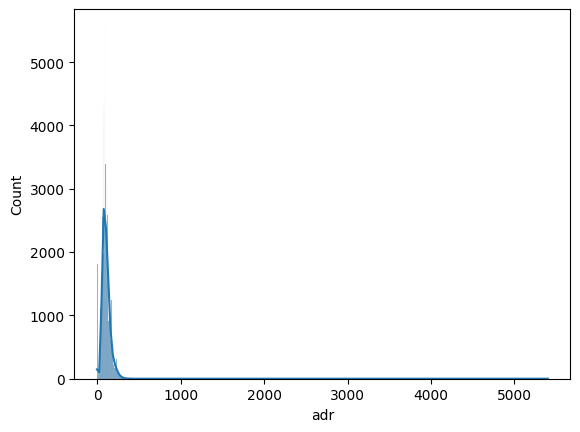

In [931]:
sns.histplot(dataframe.adr, kde=True)

In [932]:
dataframe[dataframe.adr < 0].adr

14989   -6.38
Name: adr, dtype: float64

In [933]:
handle_outliers('adr')

In [934]:
dataframe['adr'].isnull().sum()

1

In [935]:
# one value is null because it contains negative values and was applied with log function which could not take any negative values.

<Axes: xlabel='adr', ylabel='Count'>

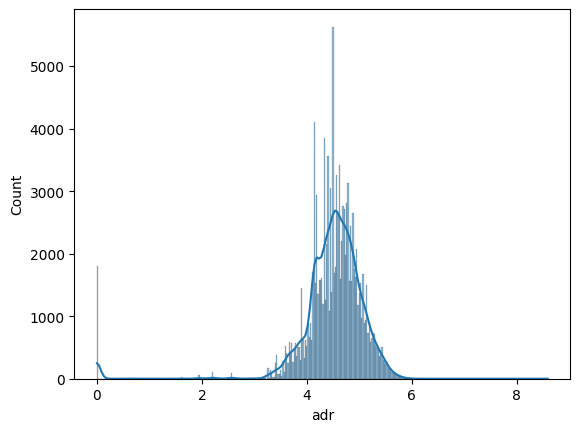

In [936]:
sns.histplot(dataframe.adr.dropna(), kde=True)

In [937]:
# select important features using correlation and univariate analysis

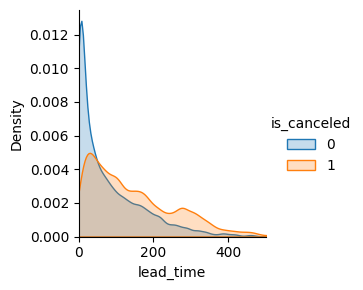

In [938]:
sns.FacetGrid(data, hue='is_canceled', xlim=(0,500)).map(sns.kdeplot, 'lead_time', shade=True).add_legend()

In [939]:
corr = dataframe.corr()

In [940]:
corr.is_canceled.sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_type                      0.481530
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
adults                            0.058182
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_dat

In [941]:
corr.is_canceled.sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_type', 'deposit_given', 'country', 'lead_time',
       'market_segment', 'assigned_room_type', 'distribution_channel', 'hotel',
       'customer_type', 'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'adults', 'days_in_waiting_list', 'meal',
       'total_customer', 'stays_in_week_nights', 'total_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'is_family',
       'babies', 'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [942]:
features_to_drop = ['reservation_status', 'reservation_status_date', 'arrival_date_year',
                  'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'children']

In [943]:
dataframe.drop(features_to_drop, axis=1, inplace=True)

In [944]:
dataframe.shape

(119210, 27)

In [945]:
# how to find important features for model building

In [946]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,0,0,0,4.763028,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,...,0,0,0,4.499810,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.28402,0.407864,...,0,0,0,4.310262,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.28402,0.407864,...,0,0,0,4.787492,0,0,1,4.0,2,0


In [947]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [948]:
dataframe.dropna(inplace=True)

In [949]:
x = dataframe.drop('is_canceled', axis=1)

In [950]:
y = dataframe.is_canceled

In [951]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [952]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [953]:
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [962]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True])

In [963]:
cols = x.columns

In [964]:
selected_features = cols[feature_sel_model.get_support()]

In [965]:
selected_features

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [966]:
x = x[selected_features]

In [967]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [968]:
# build the ml model

In [969]:
from sklearn.model_selection import train_test_split

In [970]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [971]:
X_train.shape

(89406, 12)

In [972]:
from sklearn.linear_model import LogisticRegression

In [973]:
logreg = LogisticRegression()

In [974]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [975]:
y_pred = logreg.predict(X_test)

In [976]:
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [977]:
from sklearn.metrics import confusion_matrix

In [978]:
confusion_matrix(y_test, y_pred)

array([[17358,  1407],
       [ 4578,  6460]], dtype=int64)

In [979]:
from sklearn.metrics import accuracy_score

In [980]:
accuracy_score(y_test, y_pred)

0.7991812904741133

In [981]:
# cross validate the model

In [982]:
from sklearn.model_selection import cross_val_score

In [983]:
score = cross_val_score(logreg, x, y, cv=10)

In [984]:
score

array([0.77862595, 0.7841624 , 0.78240081, 0.81369013, 0.81486452,
       0.7393675 , 0.74037413, 0.8557168 , 0.8307189 , 0.80276846])

In [985]:
score.mean()

0.7942689603930575

In [986]:
# using multiple algorithms

In [987]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [988]:
models = []

In [989]:
models.append(('LogisticRegression', LogisticRegression()))
models.append(('NaiveBayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [990]:
for name, model in models:
  print(name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  acc = accuracy_score(y_test, y_pred)
  print(acc)
  print('\n')

LogisticRegression
[[17358  1407]
 [ 4578  6460]]
0.7991812904741133


NaiveBayes
[[ 6755 12010]
 [  616 10422]]
0.5763513740227494


RandomForest
[[17168  1597]
 [ 2669  8369]]
0.8568600476462102


DecisionTree
[[15998  2767]
 [ 2623  8415]]
0.819145723584874


KNN
[[16771  1994]
 [ 3322  7716]]
0.8216286950978089


